<a href="https://colab.research.google.com/github/Vijayaranagn/Industrial_Copper_Modeling/blob/main/Industrial_Copper_Modeling_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
The copper industry deals with less complex data related to sales and pricing. However, this data may suffer from issues such as skewness and noisy data, which can affect the accuracy of manual predictions. Dealing with these challenges manually can be time-consuming and may not result in optimal pricing decisions. A machine learning regression model can address these issues by utilizing advanced techniques such as data normalization, feature scaling, and outlier detection, and leveraging algorithms that are robust to skewed and noisy data. 


Another area where the copper industry faces challenges is in capturing the leads. A lead classification model is a system for evaluating and classifying leads based on how likely they are to become a customer . You can use the STATUS variable with WON being considered as Success and LOST being considered as Failure and remove data points other than WON, LOST STATUS values.


**Import Needed packages**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn.metrics import  classification_report, roc_curve, auc
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("daily_offers.csv")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00


In [7]:
df.shape

(33540, 14)

In [8]:
df1 = df.copy()

In [9]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [17]:
df.nunique()

id               33539
item_date           36
quantity tons    33540
customer           794
country             16
status               8
item type            6
application         29
thickness          416
width             1030
material_ref      7827
product_ref         29
delivery date       20
selling_price     2887
dtype: int64

In [18]:
df.isnull().sum()

id                   1
item_date            1
quantity tons        0
customer             1
country              1
status               1
item type            1
application          1
thickness            1
width                1
material_ref     14458
product_ref          1
delivery date        2
selling_price        1
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33540 entries, 0 to 33539
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             33539 non-null  object 
 1   item_date      33539 non-null  object 
 2   quantity tons  33540 non-null  float64
 3   customer       33539 non-null  float64
 4   country        33539 non-null  float64
 5   status         33539 non-null  object 
 6   item type      33539 non-null  object 
 7   application    33539 non-null  float64
 8   thickness      33539 non-null  float64
 9   width          33539 non-null  float64
 10  material_ref   19082 non-null  object 
 11  product_ref    33539 non-null  float64
 12  delivery date  33538 non-null  object 
 13  selling_price  33539 non-null  float64
dtypes: float64(8), object(6)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


# **Dealing with data in wrong format**

In [11]:
# dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [21]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)
df.info()

id                   1
item_date            1
quantity tons        0
customer             1
country              1
status               1
item type            1
application          1
thickness            1
width                1
material_ref     14458
product_ref          1
delivery date        2
selling_price        1
dtype: int64
(33540, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33540 entries, 0 to 33539
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             33539 non-null  object 
 1   item_date      33539 non-null  object 
 2   quantity tons  33540 non-null  float64
 3   customer       33539 non-null  float64
 4   country        33539 non-null  float64
 5   status         33539 non-null  object 
 6   item type      33539 non-null  object 
 7   application    33539 non-null  float64
 8   thickness      33539 non-null  float64
 9   width          33539 non-null  float64
 10  material_re

#Dealing with Missing Values

In [22]:
# material_ref has large set of null values, so replacing them with unknown 
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [23]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(33536, 14)


#Finding Duplicate Values

In [24]:
#checking for no of duplicate values
df.duplicated().sum()

0

In [25]:
df1=df.copy()

In [27]:
print('Skewness:', skew(df1['quantity tons']))
print('Skewness:', skew(df1['country']))
print('Skewness:', skew(df1['application']))
print('Skewness:', skew(df1['thickness']))
print('Skewness:', skew(df1['width']))
print('Skewness:', skew(df1['selling_price']))

Skewness: 24.348772893399648
Skewness: 0.9123062470163177
Skewness: 0.6641111182988635
Skewness: 173.03101502029884
Skewness: 0.5052623858157951
Skewness: 183.12013412943338


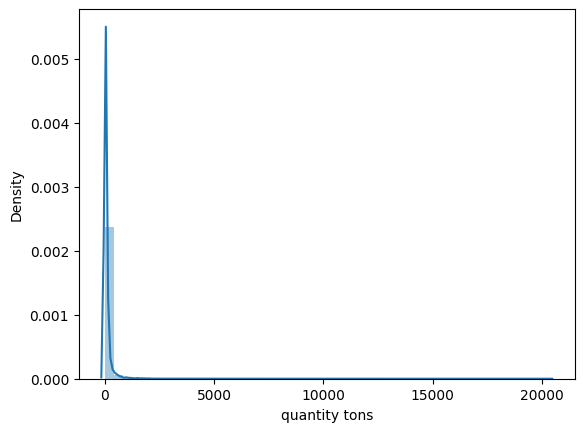

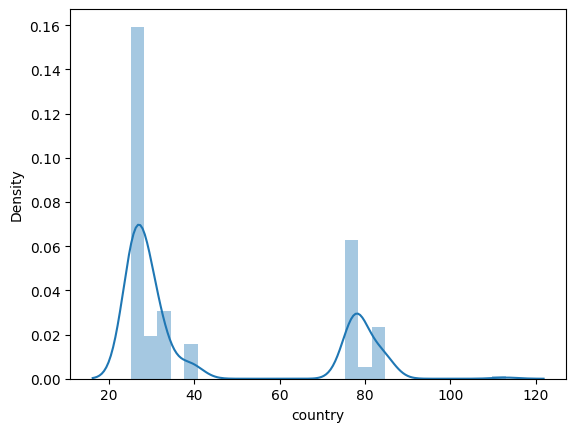

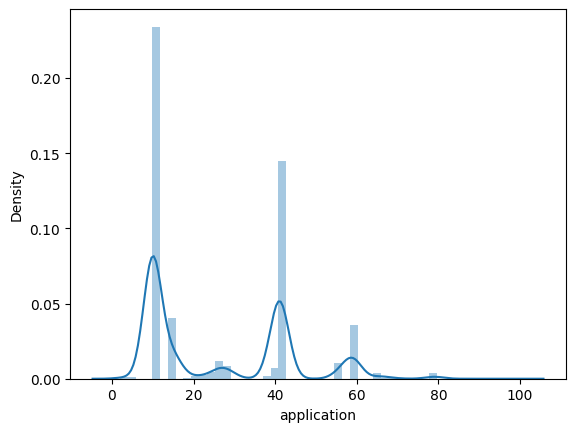

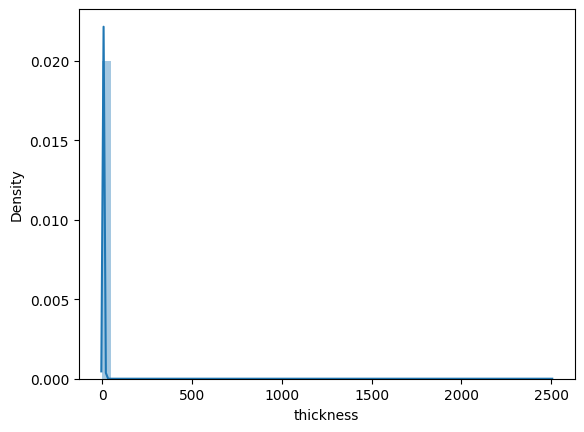

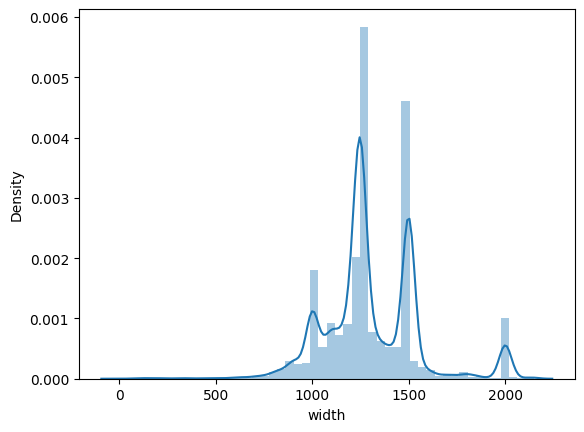

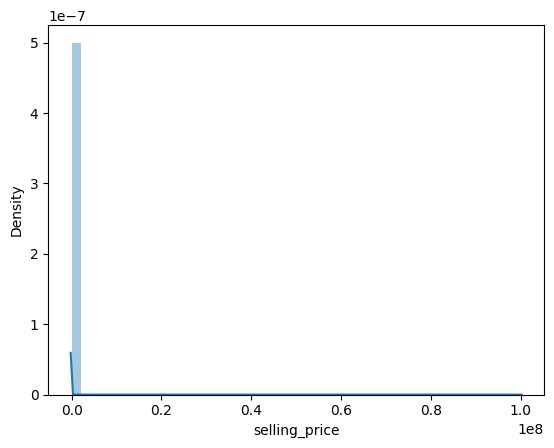

In [28]:
# ['quantity tons','selling_price','application','thickness','width', 'country']
# ['status','item type']

df['quantity tons']   # skewed
df['country']
df['application']
df['thickness']       # skewed
df['width']           
df['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['quantity tons'])
plt.show()
sns.distplot(df['country'])
plt.show()
sns.distplot(df['application'])
plt.show()
sns.distplot(df['thickness'])
plt.show()
sns.distplot(df['width'])
plt.show()
sns.distplot(df['selling_price'])
plt.show()

In [30]:
import numpy as np
mask1 = df1['selling_price'] <= 0
print(mask1.sum())
df1.loc[mask1, 'selling_price'] = np.nan

mask1 = df1['quantity tons'] <= 0
print(mask1.sum())
df1.loc[mask1, 'quantity tons'] = np.nan

mask1 = df['thickness'] <= 0
print(mask1.sum())
df1.loc[mask1, 'thickness'] = np.nan

0
0
0


In [31]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    2
dtype: int64

In [32]:
df1.dropna(inplace=True)
len(df1)

33534

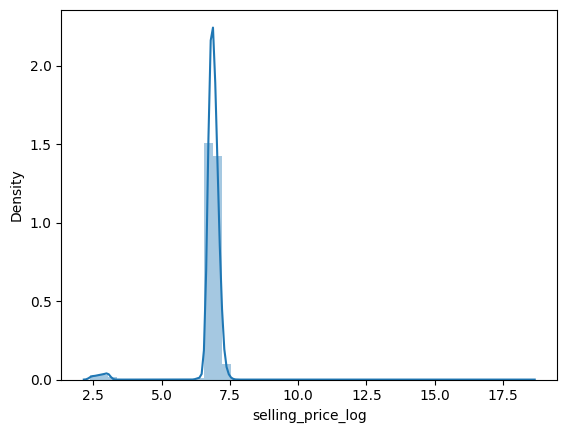

Skewness: -5.445515470092898


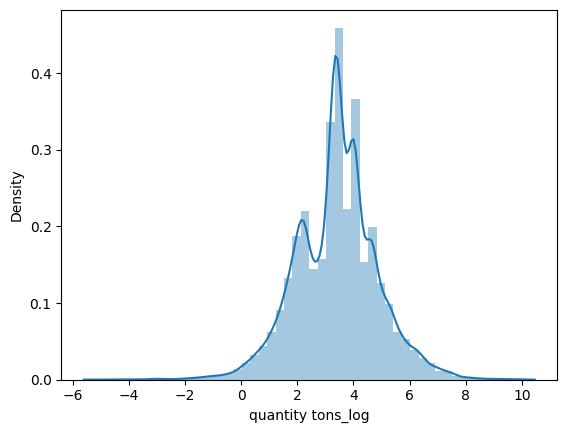

Skewness: -0.08414060199054592


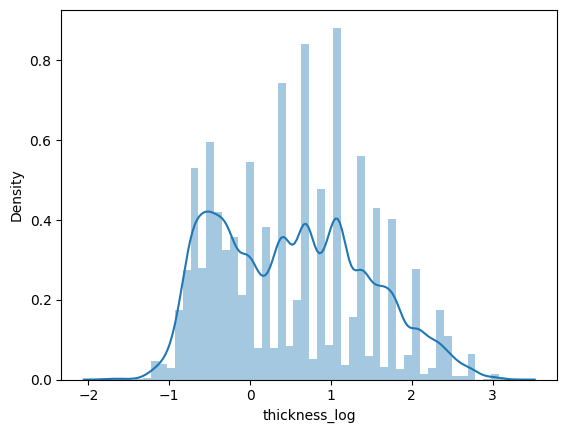

Skewness: 0.2632798757216177


In [33]:
import numpy as np
df1['selling_price_log'] = np.log(df1['selling_price'])
sns.distplot(df1['selling_price_log'])
plt.show()
print('Skewness:', skew(df1['selling_price_log']))

df1['quantity tons_log'] = np.log(df1['quantity tons'])
sns.distplot(df1['quantity tons_log'])
plt.show()
print('Skewness:', skew(df1['quantity tons_log']))

df1['thickness_log'] = np.log(df1['thickness'])
sns.distplot(df1['thickness_log'])
plt.show()
print('Skewness:', skew(df1['thickness_log']))

In [34]:
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1.668702e+09,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.00,6.357842,6.666354,1.386294


#EDA

#SKEWNESS VISUALIZATION

visualize skewness using boxplot, violinplot, and distplot before transformation

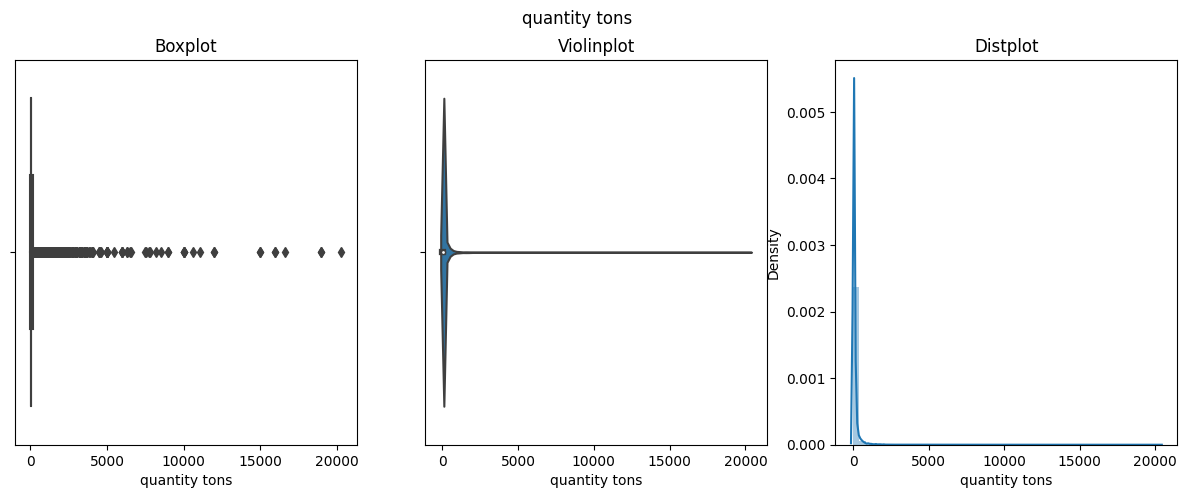

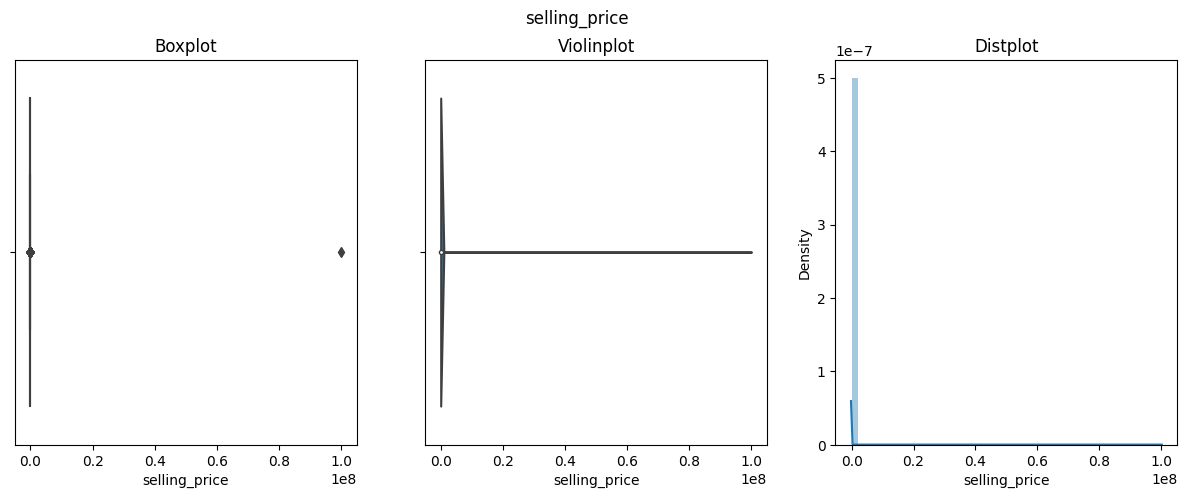

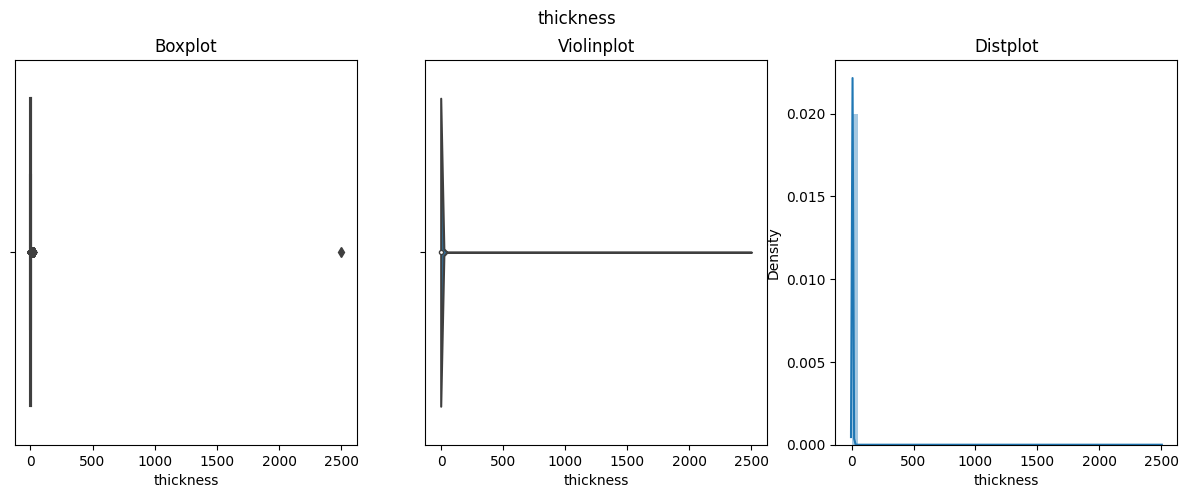

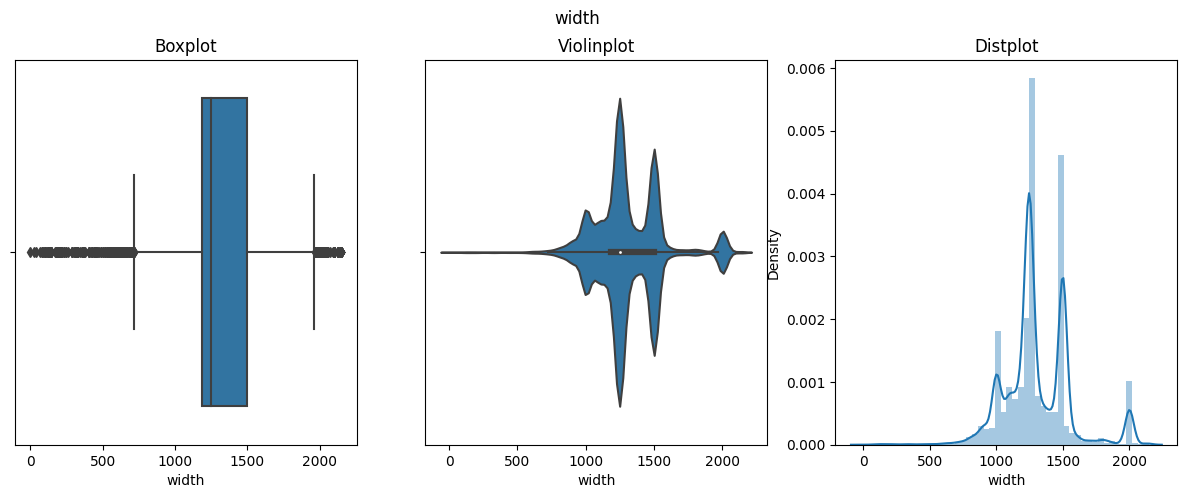

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['quantity tons', 'selling_price', 'thickness','width' ] 
for col in cols:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(col)

    # boxplot
    sns.boxplot(x=df[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    # violinplot
    sns.violinplot(x=df[col], ax=ax[1])
    ax[1].set_title('Violinplot')

    # distplot
    sns.distplot(df[col], ax=ax[2])
    ax[2].set_title('Distplot')

    plt.show()

#**Visualize Skewness Using Boxplot, Violinplot, and Distplot After Transformation**

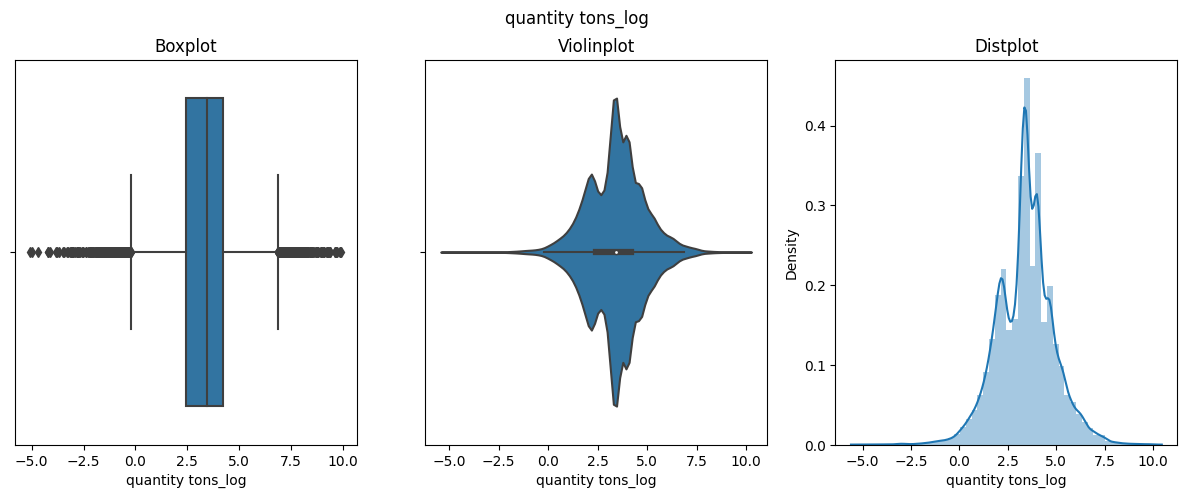

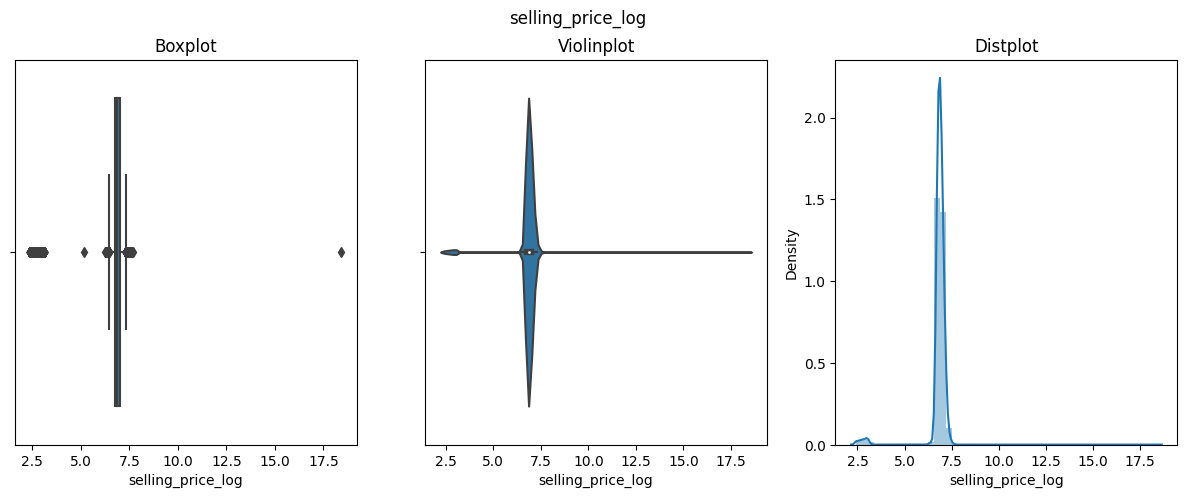

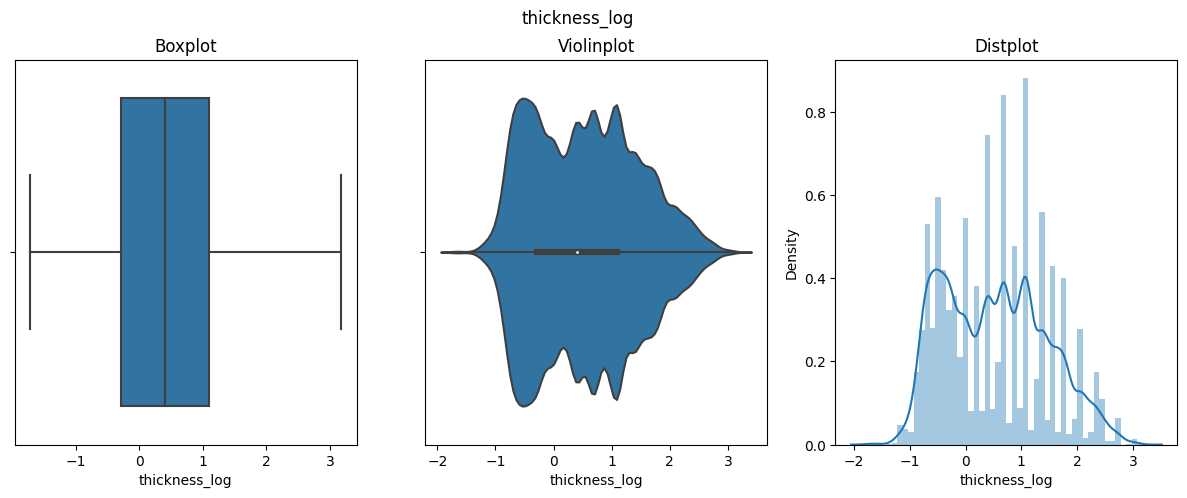

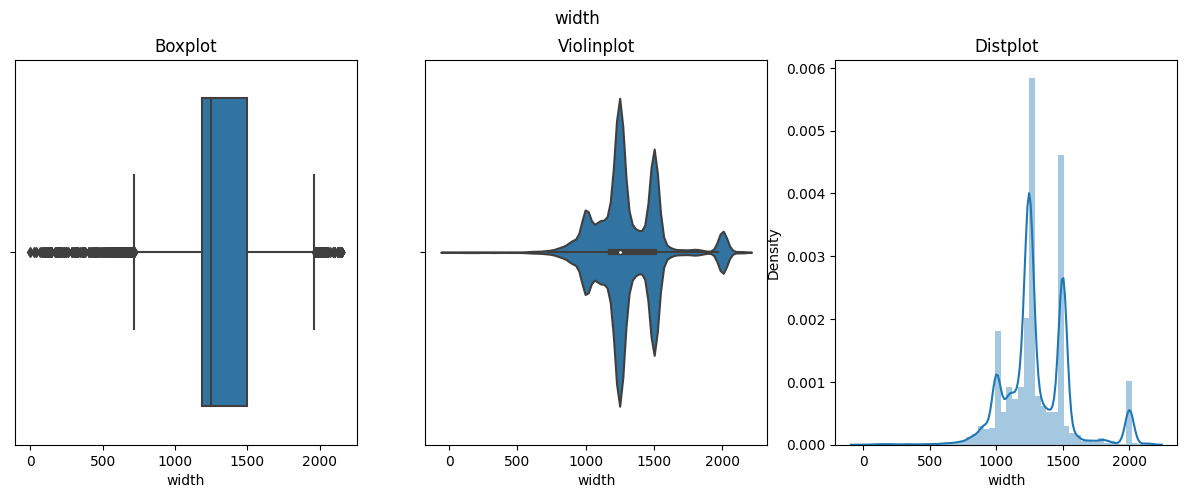

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['quantity tons_log', 'selling_price_log', 'thickness_log', 'width'] 
for col in cols:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(col)

    # boxplot
    sns.boxplot(x=df1[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    # violinplot
    sns.violinplot(x=df1[col], ax=ax[1])
    ax[1].set_title('Violinplot')

    # distplot
    sns.distplot(df1[col], ax=ax[2])
    ax[2].set_title('Distplot')

    plt.show()

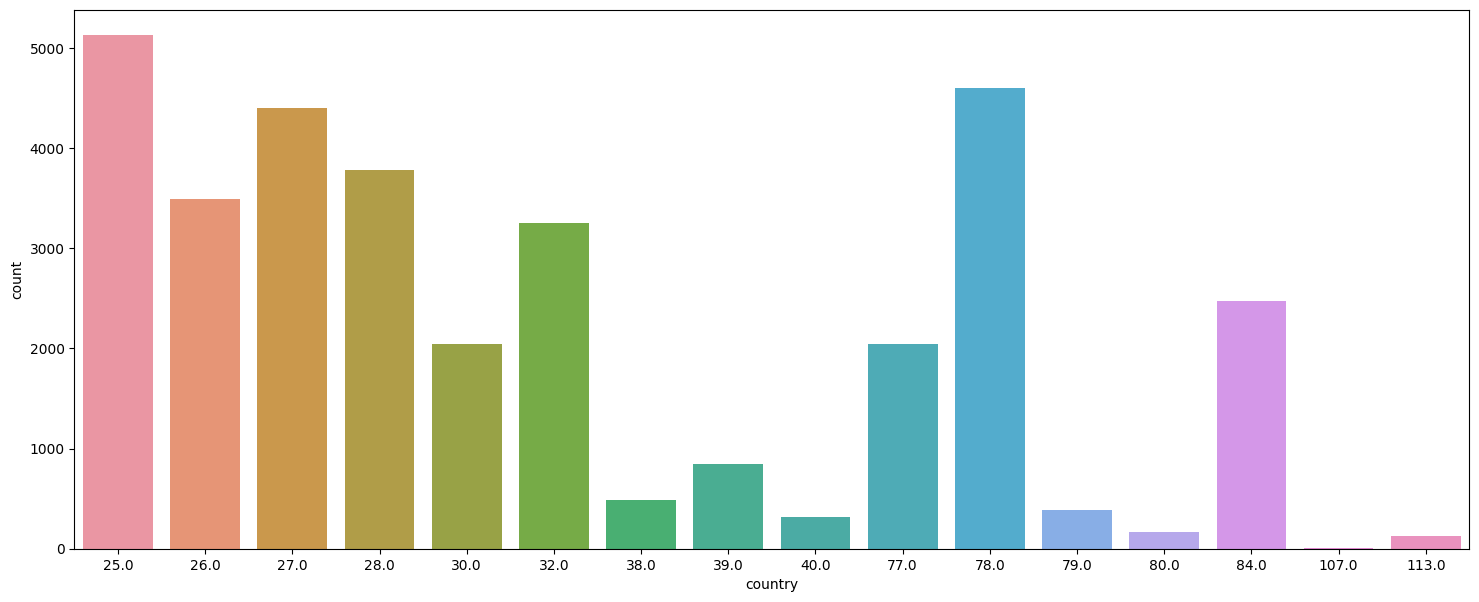

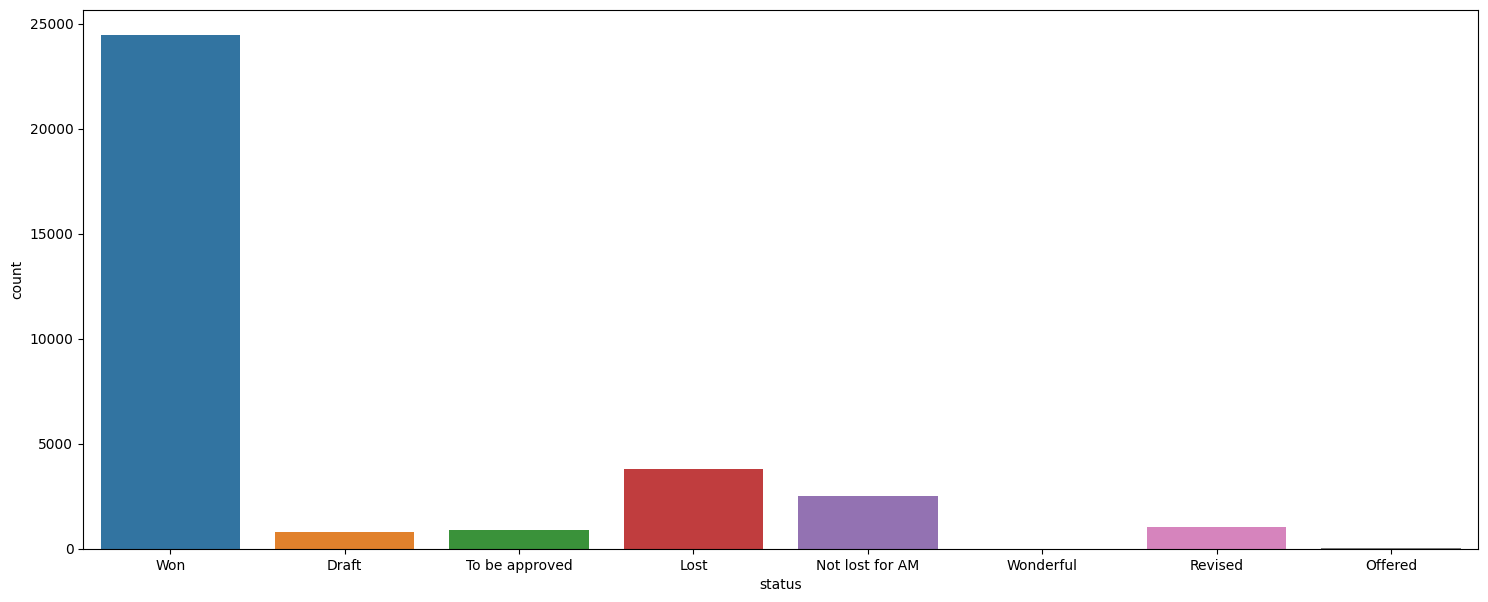

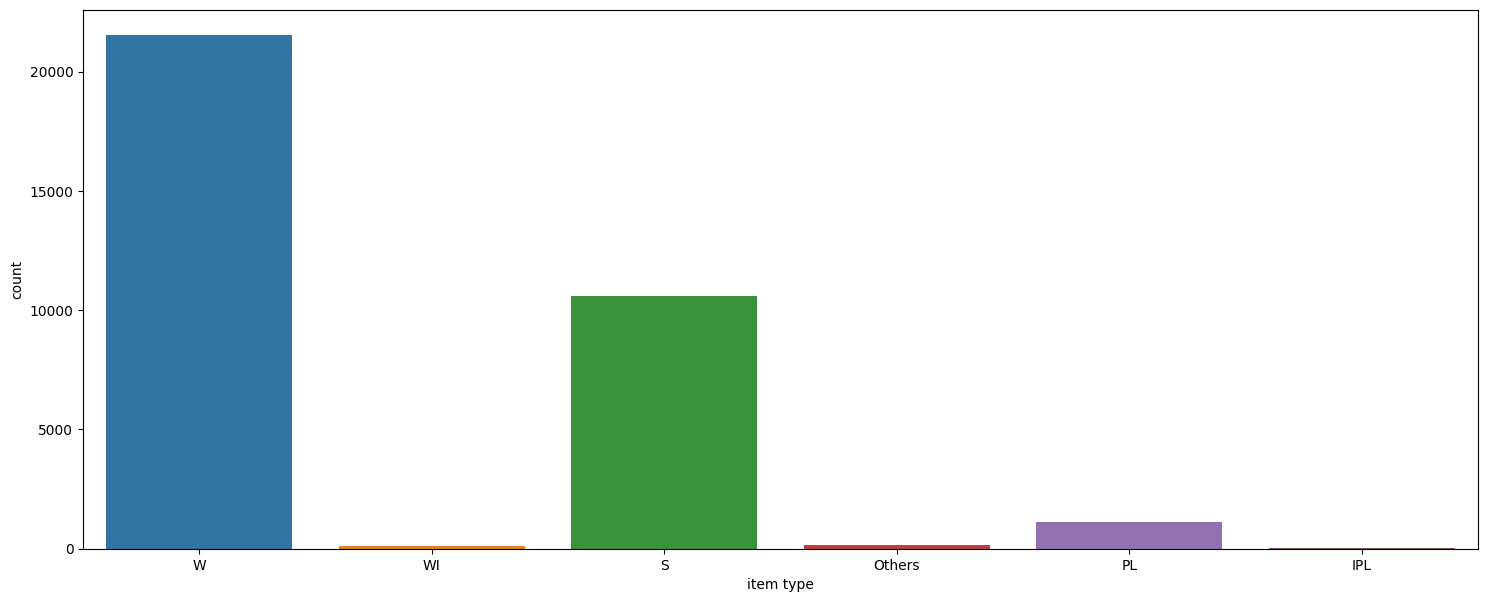

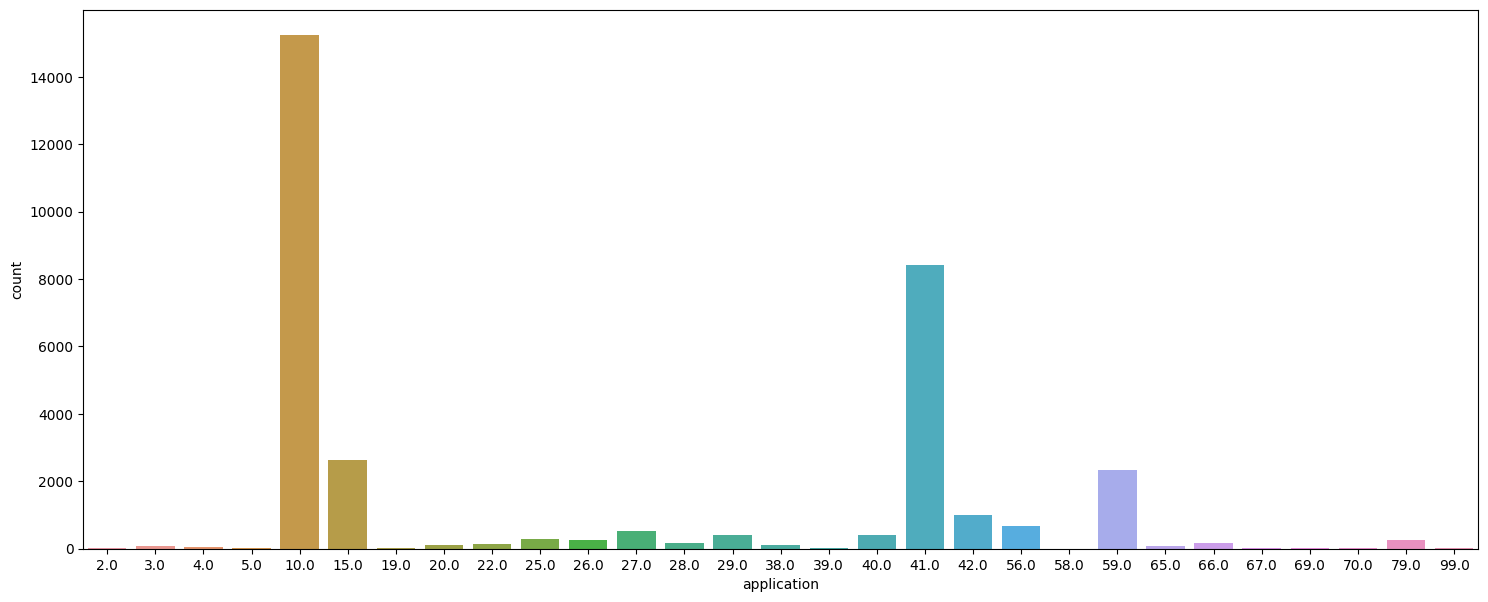

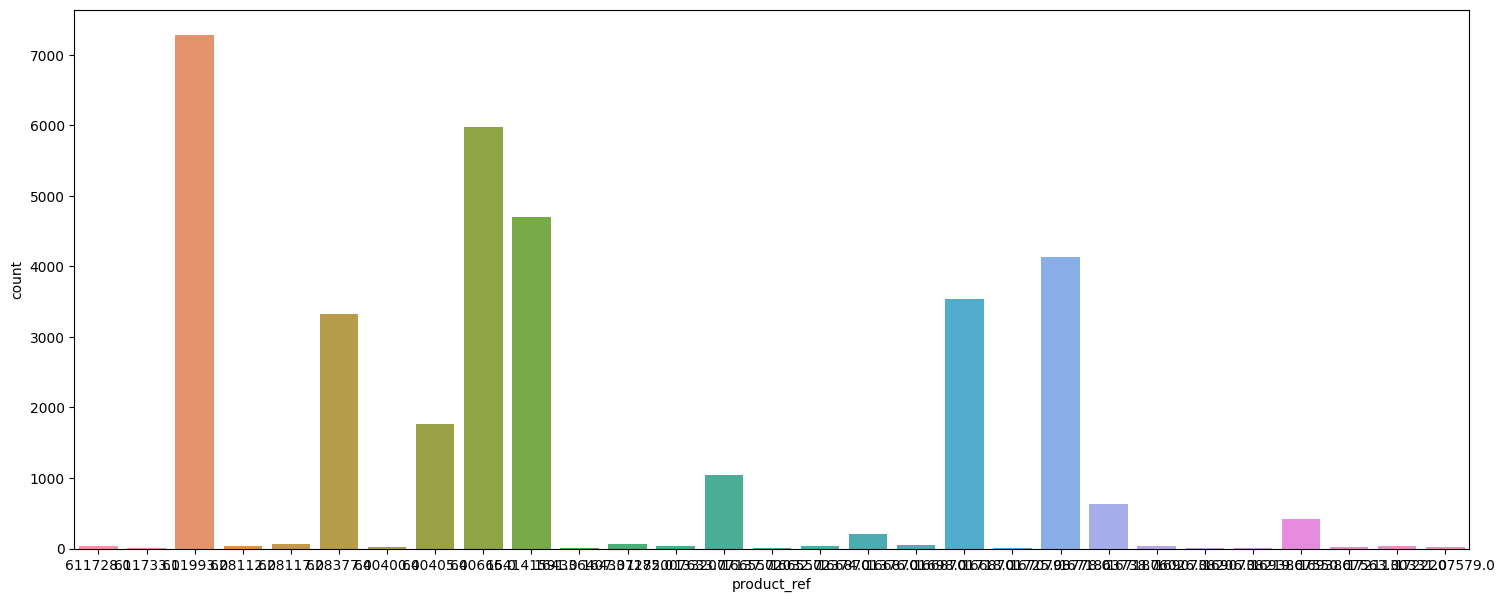

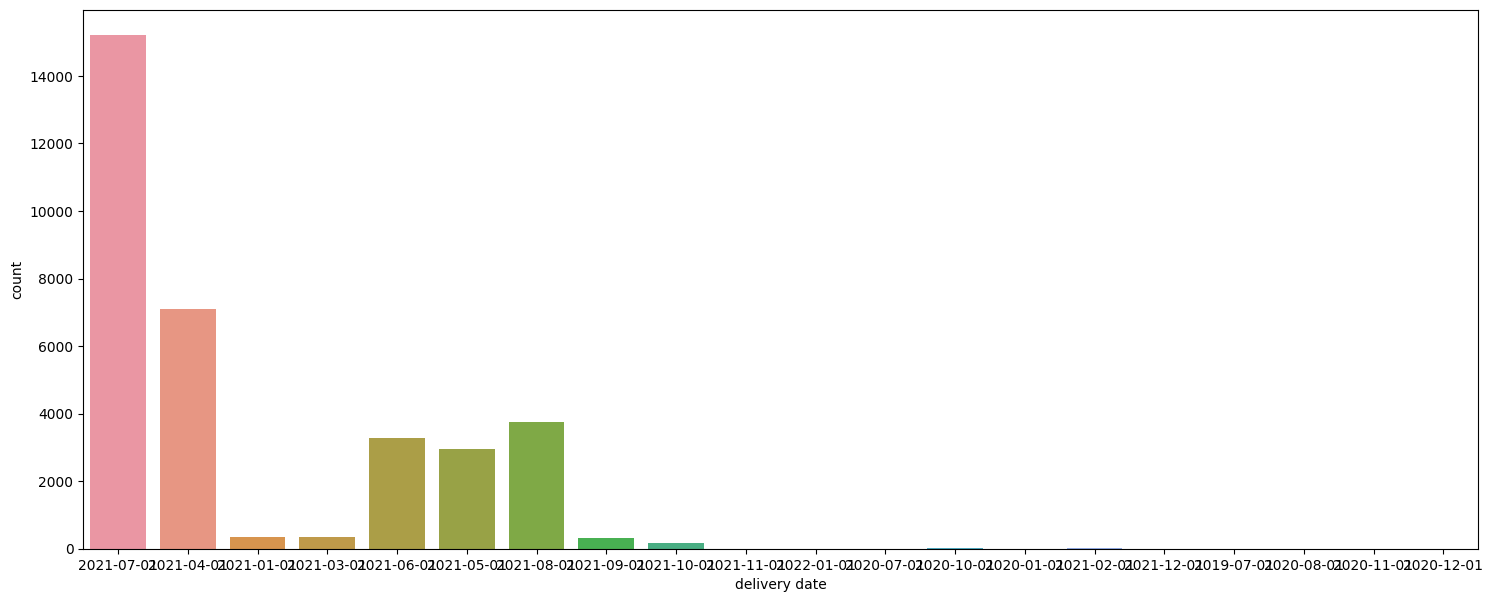

In [39]:
for i in df.columns:
  if(df1[i].nunique()<35):
    plt.figure(figsize=(18,7))
    sns.countplot(x=df[i])
    plt.show()

In [49]:
x=df1[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

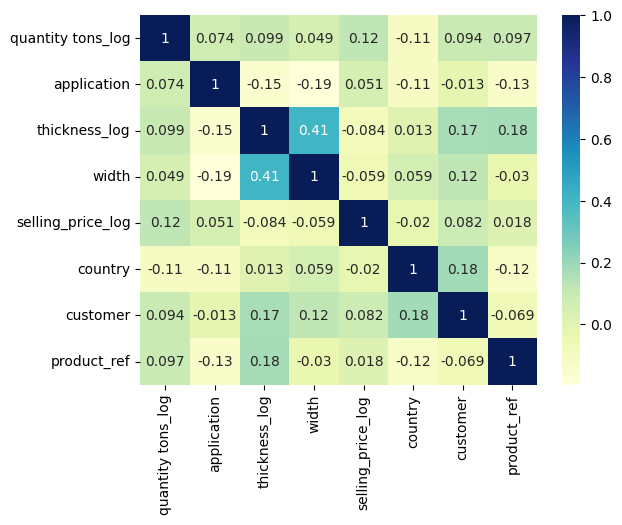

In [50]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

#**MODEL**
#**DECISION TREE REGRESSOR**
Feature and Target Selection

In [47]:
# X --> Feature y-- >target
X=df1[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']

In [54]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)

#**split**

In [57]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#**scale**

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Decision Tree Regressor model**

In [58]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean squared error: 0.006377421066368828
R-squared: 0.9846931562773301


 **Predict the selling price for new values**

In [60]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [1133.77931365]


**Saving the model**

In [61]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [62]:
print(len(df1))
df1.head(3)

33534


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1.668702e+09,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,6.468211,5.956169,-0.967584


In [63]:
df2 = df1[df1['status'].isin(['Won', 'Lost'])]
len(df2)

28258

#**DECISION TREE CLASSIFIER**
**Feature and Target Selection**

In [65]:
## X --> Feature y-- >target
X= df2[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]
Y = df2['status']

#**Encode**

In [67]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)

#**split**

In [68]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#**scale**

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Decision tree classifier model**

In [70]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9382519462137296
Confusion Matrix:
[[ 585  172]
 [ 177 4718]]


#**Evalution Metrics**

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       757
           1       0.96      0.96      0.96      4895

    accuracy                           0.94      5652
   macro avg       0.87      0.87      0.87      5652
weighted avg       0.94      0.94      0.94      5652

Classification Report:


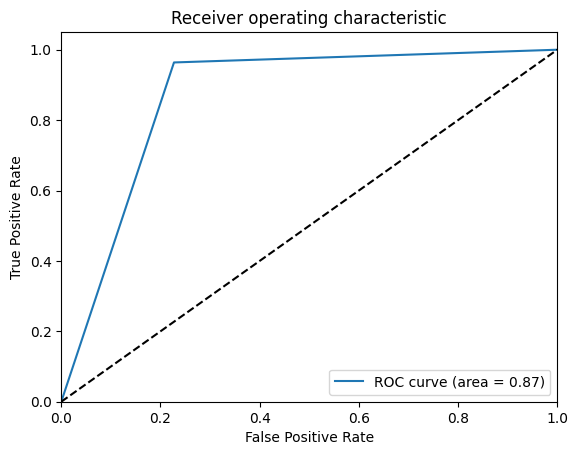

In [71]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))
print("Classification Report:")
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#**Predict the status for a new sample**

In [72]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(630), np.log(986), 41, np.log(2),1200,25.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [73]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)